# Model Development

Notes:
- Many times, people COMBINE SEVERAL MODELS together to get final model
- Taking the MODE (OR VALUE THAT APPEARS MOST OFTEN) is a very simple method of prediction

## Regression Algorithm
- linear regression
- polynomial regression
- poisson regression
- ordinary least squares regression (OLS)
- ordinal regression
- support vector regression
- gradient descent regression
- stepwise regression
- lasso regression
- ridge regression
- elastic net regression
- bayesian linear regression
- least-angled regression (LARS)
- neural network regression
- locally estimated scatterplot smoothing (LOESS)
- multivariate adaptive regression splines (MARS)
- locally weighted regression (LWL)
- quantile regression
- principal component regression (PCR)
- partial least squares regression
- segmented regression

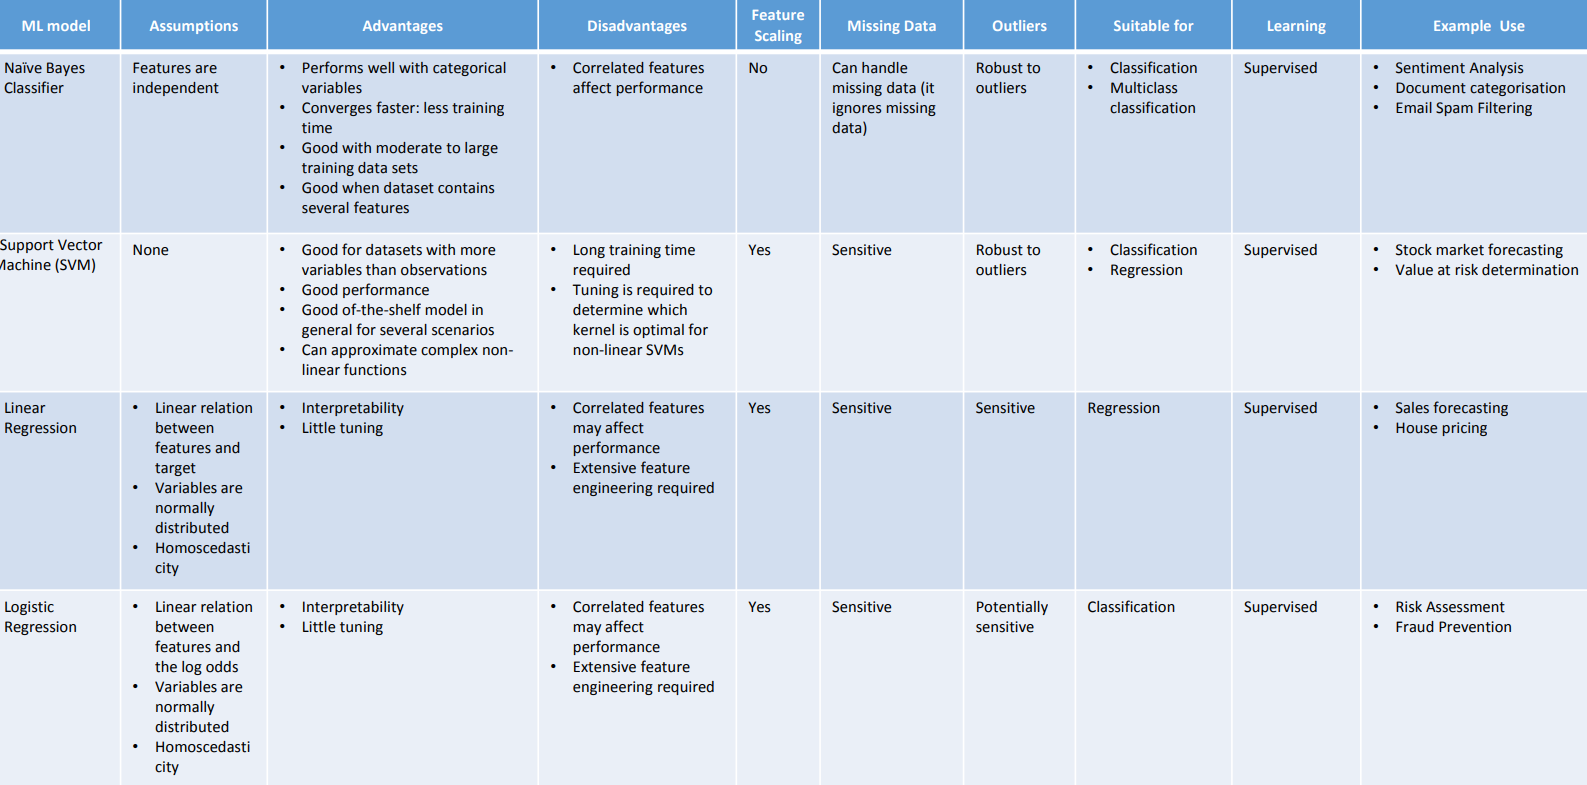

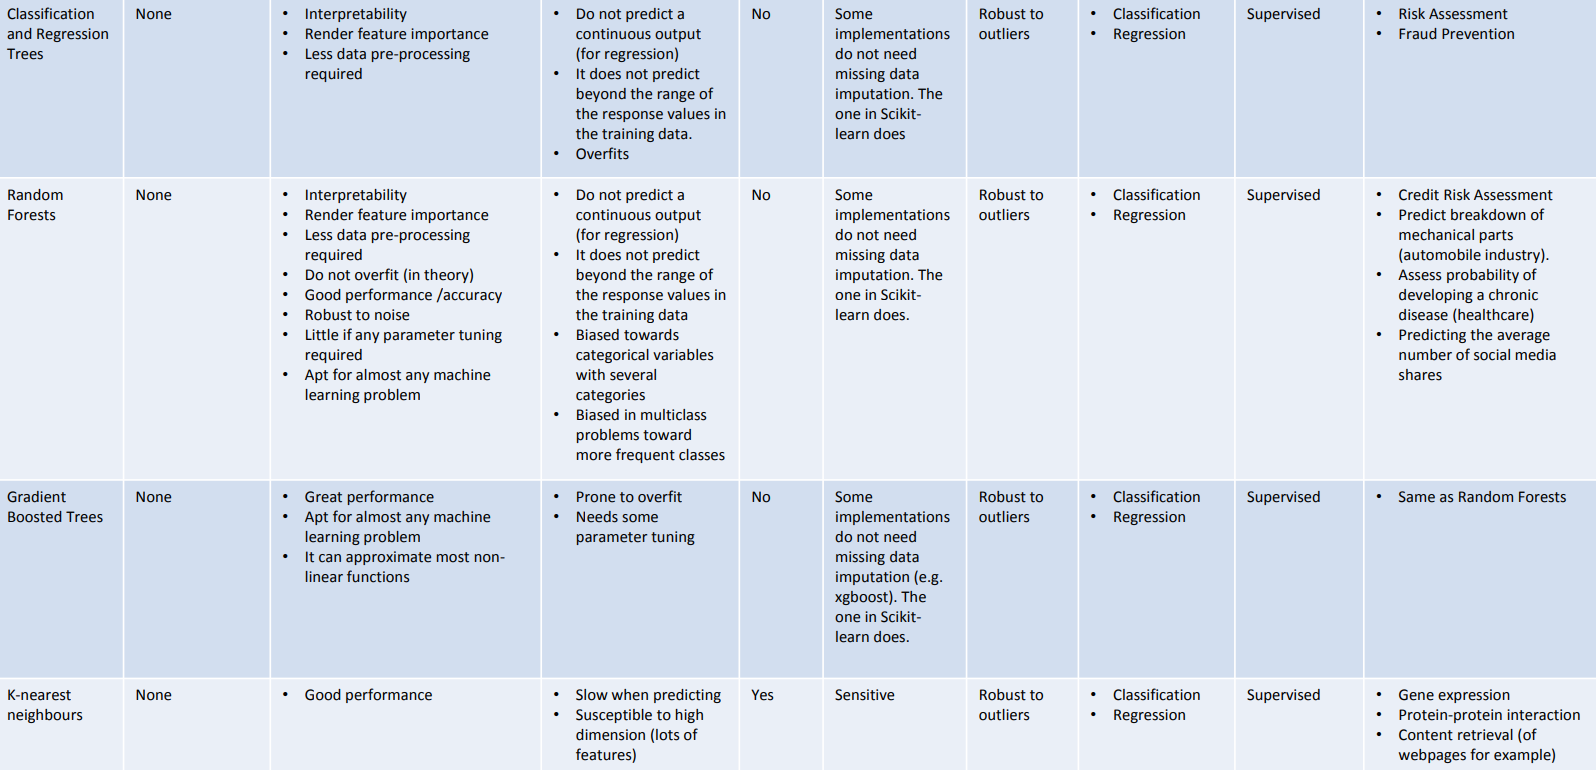

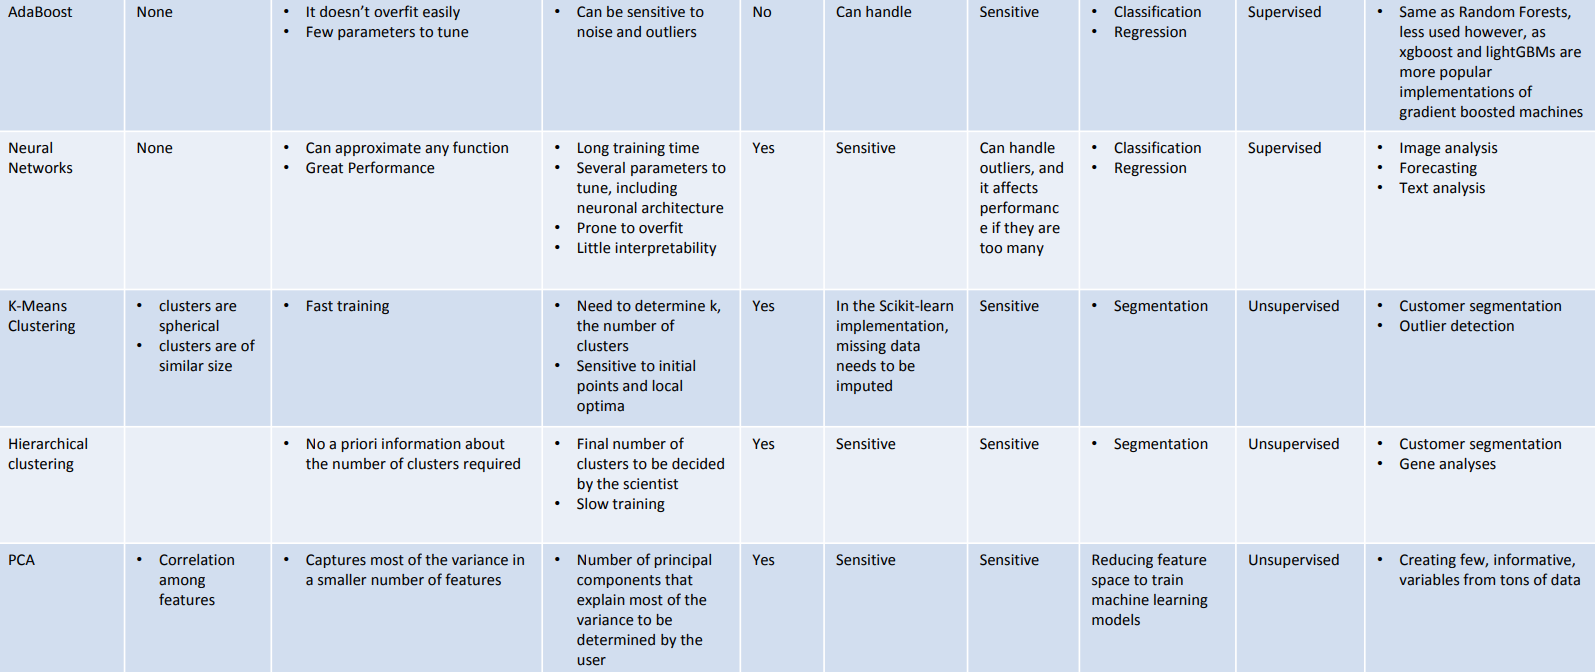

Cohen's Kappa
statistic that is used to measure inter-rater reliability (and also Intra-rater reliability) for qualitative (categorical) items https://stats.stackexchange.com/questions/82162/cohens-kappa-in-plain-english

### Linear Regression Notes

Assess by:
- Linear regression can be assessed by scatter-plots and residuals plots
- Normal distribution can be assessed by Q-Q plots
- Multi-colinearity can be assessed by correlation matrices
- Homoscedasticity can be assessed by residuals plots

What can we do if the assumptions are not met?
- Mathematical transformation of the variables
- Discretisation

In [ ]:
# for the Q-Q plots
import scipy.stats as stats
# for linear regression
from sklearn.linear_model import LinearRegression

# to split and standarize the dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# to evaluate the regression model
from sklearn.metrics import mean_squared_error

In [ ]:
# assess linear regression with scatter plot
# Do for each independent variable 
sns.lmplot(x="LSTAT", y="MEDV", data=boston, order=1)

# The form we want it to take is below:

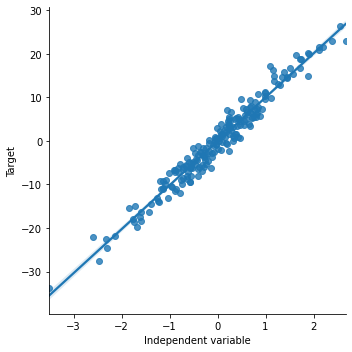

In [ ]:
# If the points are not scattered about line as above then
# apply a log transformation to the independent variable
boston['log_crim'] = np.log(boston['CRIM'])

# plot the transformed CRIM variable vs MEDV
sns.lmplot(x="log_crim", y="MEDV", data=boston, order=1)

##### Assess linear regression with residual plot

This is the distribution of the errors, or the residuals. The residuals refer to the difference between the predictions and the real value of the target. It is performed as follows:

1) make a linear regression model using the desired variables (X)

2) obtain the predictions 

3) determine the error (True house price - predicted house price)

4) observe the distribution of the error.

If the house price, in this case MEDV, is linearly explained by the variables we are evaluating, then the error should be random noise, and should typically follow a normal distribution centered at 0. We expect to see the error terms for each observation lying around 0.

In [ ]:
# SIMULATED DATA

# step 1: make a linear model
# call the linear model from sklearn
linreg = LinearRegression()

# fit the model
linreg.fit(toy_df['x'].to_frame(), toy_df['y'])

# step 2: obtain the predictions
# make the predictions
pred = linreg.predict(toy_df['x'].to_frame())

# step 3: calculate the residuals
error = toy_df['y'] - pred

# plot predicted vs real
plt.scatter(x=pred, y=toy_df['y'])
plt.xlabel('Predictions')
plt.ylabel('Real value')

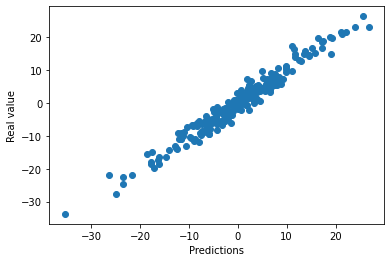

The model makes good predictions. The predictions are quite aligned with the real value of the target.

In [ ]:
# step 4: observe the distribution of the errors

# Residuals plot
# if the relationship is linear, the noise should be
# random, centered around zero, and follow a normal distribution

# we plot the error terms vs the independent variable x
# error values should be around 0 and homogeneously distributed

plt.scatter(y=error, x=toy_df['x'])
plt.ylabel('Residuals')
plt.xlabel('Independent variable x')

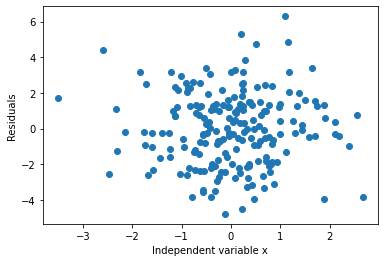

The errors are distributed around 0, as expected.

In [ ]:
# step 4: observe the distribution of the errors

# plot a histogram of the residuals
# they should follow a gaussian distribution
# centered around 0

sns.distplot(error, bins=30)
plt.xlabel('Residuals')

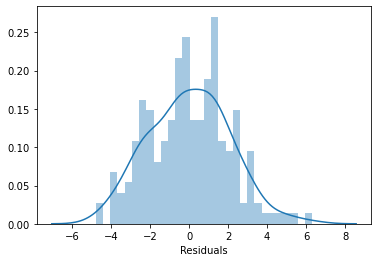

The errors adopt a Gaussian distribution and it is centered around 0. So it meets the assumptions, as expected.

Do for other variables

Below is an example of NOT being distributed around zero so would do a log transform on the independent variable.

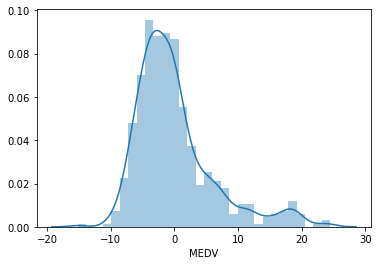

In [ ]:
# let's repeat the exercise but fitting the model to the
# log transformed LSTAT

# call the linear model from sklearn
linreg = LinearRegression()

# fit the model ***LOG TRANSFORM IS HERE
linreg.fit(np.log(boston['LSTAT']).to_frame(), boston['MEDV'])

# make the predictions
pred = linreg.predict(np.log(boston['LSTAT']).to_frame())

# calculate the residuals
error = boston['MEDV'] - pred

# plot predicted vs real
plt.scatter(x=pred, y=boston['MEDV'])
plt.xlabel('Predictions')
plt.ylabel('MEDV')

##### Multicolinearity

To determine co-linearity, we evaluate the correlation of all the independent variables in the dataframe.

In [ ]:
# we calculate the correlations using pandas corr
# and we round the values to 2 decimals
correlation_matrix = boston[features].corr().round(2)

# plot the correlation matrix usng seaborn
# annot = True to print the correlation values
# inside the squares

figure = plt.figure(figsize=(12, 12))
sns.heatmap(data=correlation_matrix, annot=True)

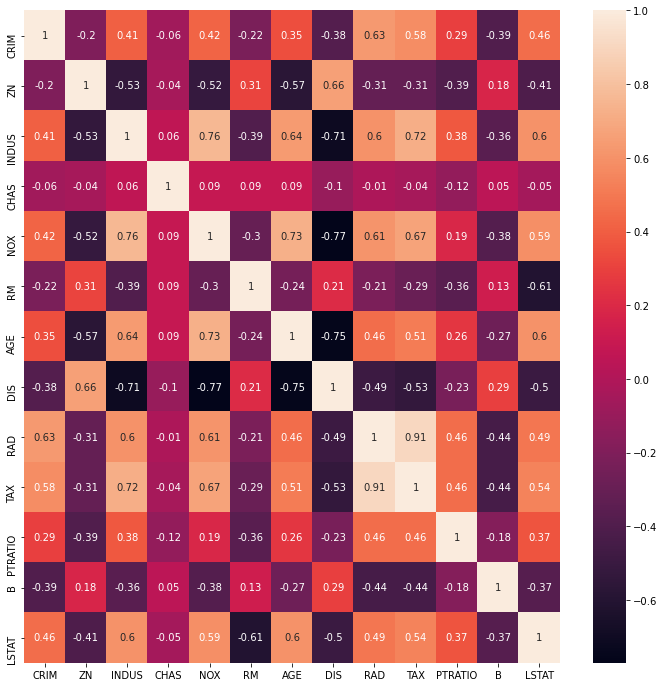

On the x and y axis of the heatmap we have the variables of the boston house dataframe. Within each square, the correlation value between those 2 variables is indicated. For example, for LSTAT vs CRIM at the bottom left of the heatmap, we see a correlation of 0.46. These 2 variables are not highly correlated.

Instead, for the variables RAD and TAX (try and find them in the plot), the correlation is 0.91. These variables are highly correlated. The same is true for the variables NOX and DIS, which show a correlation value of -0.71.

Let's see how they look in a scatter plot.

In [ ]:
# and now NOX (itric oxides concentration (parts per 10 million))
# and DIS (weighted distances to five Boston employment centres)

sns.lmplot(x="NOX", y="DIS", data=boston, order=1)

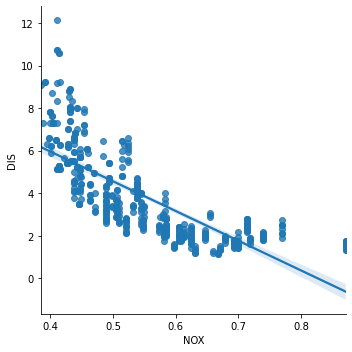

The correlation, or co-linearity between NOX and DIS, is quite obvious in the above scatter plot. So these variables are violating the assumption of no multi co-linearity.

What we would do is remove 1 of the 2 from the dataset before training the linear model.

##### Normality

We evaluate normality using histograms and Q-Q plots. I explain Q-Q plots a few cells below. 

Let's begin with histograms. If the variable is normally distributed, we should observe the typical Gaussian bell shape.

###### Histograms

Do for each variable of interest

In [ ]:
# histogram of the variable LSTAT
# (% lower status of the population)

sns.distplot(boston['LSTAT'], bins=30)

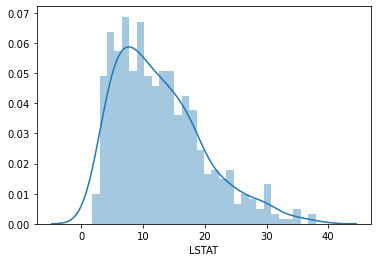

In [ ]:
# LSTAT is skewed. Let's see if a transformation fixes this.

# histogram of the log-transformed LSTAT for comparison
sns.distplot(np.log(boston['LSTAT']), bins=30)

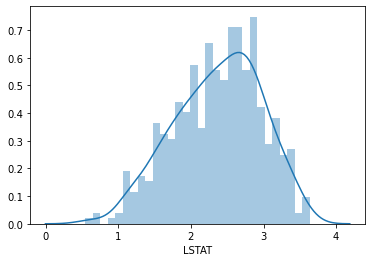

The distribution is less skewed, but not totally normal either. We could go ahead and try other transformations. I will say more on this in a dedicated section later in the course.

##### Q-Q plots

In a Q-Q plot, the quantiles of the variable are plotted on the vertical axis (y), and the quantiles of a specified probability distribution (Gaussian distribution) are indicated on the horizontal axis (x). The plot consists of a series of points that show the relationship between the quantiles of the real data and the quantiles of the specified probability distribution. If the values of a variable perfectly match the specified probability distribution (i.e., the normal distribution), the points on the graph will form a 45 degree line. See below.

In [ ]:
# let's do the same for RM
stats.probplot(boston['RM'], dist="norm", plot=plt)
plt.show()

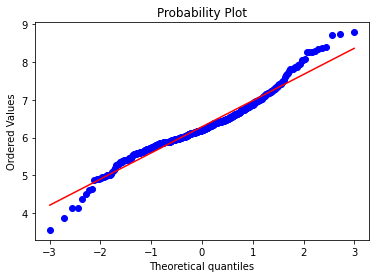

Most of the points adjust to the 45 degree line. However, the values at both ends of the distribution deviate from the line. This indicates that the distribution of RM is not perfectly Gaussian.

In [ ]:
# IF NECESSARY, do a log transformation to see if improves the normality
# and now for the log transformed LSTAT
stats.probplot(np.log(boston['LSTAT']), dist="norm", plot=plt)
plt.show()

##### Homocedasticity

Homoscedasticity, also known as homogeneity of variance, describes a situation in which the error term (that is, the “noise” or random disturbance in the relationship between the independent variables X and the dependent variable Y is the same across all the independent variables.

The way to identify if the variables are homoscedastic, is to make a linear model with all the independent variables involved, calculate the residuals, and plot the residuals vs each one of the independent variables. If the distribution of the residuals is homogeneous across the variable values, then the variables are homoscedastic.

There are other tests for homoscedasticity:

- Residuals plot
- Levene’s test
- Barlett’s test
- Goldfeld-Quandt Test

But those escape the scope of this course. So for this demo I will focus on residual plot analysis.

In [ ]:
# to train and evaluate the model, let's first split into
# train and test data, using the variables of choice:
# LSTAT, RM and CRIM

# let's separate into training and testing set
# using the sklearn function below

X_train, X_test, y_train, y_test = train_test_split(
    boston[['RM', 'LSTAT', 'CRIM']],
    boston['MEDV'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
# let's scale the features

scaler = StandardScaler()
scaler.fit(X_train)

In [ ]:
# model build using the natural distributions

# call the model
linreg = LinearRegression()

# train the model
linreg.fit(scaler.transform(X_train), y_train)

# make predictions on the train set and calculate
# the mean squared error
print('Train set')
pred = linreg.predict(scaler.transform(X_train))
print('Linear Regression mse: {}'.format(mean_squared_error(y_train, pred)))

# make predictions on the test set and calculate
# the mean squared error
print('Test set')
pred = linreg.predict(scaler.transform(X_test))
print('Linear Regression mse: {}'.format(mean_squared_error(y_test, pred)))
print()

In [ ]:
# let's plot the residuals vs RM (do for LM as well)
plt.scatter(x=X_test['RM'], y=error)
plt.xlabel('RM')
plt.ylabel('Residuals')

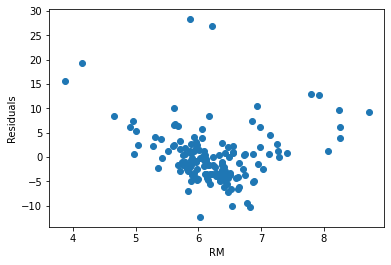

For this variable, the residuals do not seem to be homogeneously distributed across the values of RM. In fact, low and high values of RM show higher error terms.

The distribution of the residuals is fairly normal, but not quite, with more high values than expected towards the right end of the distribution.

In [ ]:
# in this cell, I want to introduce the use of yellobricks
# a library for visualisation of machine learning model outcomes

# if you don't have yellowbricks installed, comment out
# this cell to avoid errors while running the notebook

# yellowbricks allows you to visualise the residuals of the
# models after fitting a linear regression

from yellowbrick.regressor import ResidualsPlot

linreg = LinearRegression()
linreg.fit(scaler.transform(X_train), y_train)
visualizer = ResidualsPlot(linreg)

visualizer.fit(scaler.transform(X_train), y_train)  # Fit the training data to the model
visualizer.score(scaler.transform(X_test), y_test)  # Evaluate the model on the test data
visualizer.poof()

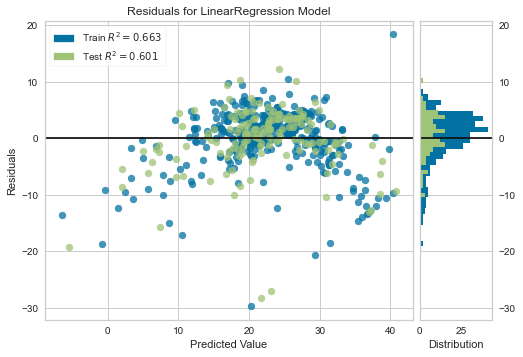

We see from the plot that the residuals are not homogeneously distributed across the predicted value and are not centered around zero either.

Let's see if transformation of the variables CRIM and LSTAT helps improve the fit and the homoscedasticity.

In [ ]:
# log transform the variables THEN REDO CODE FROM ABOVE
boston['LSTAT'] = np.log(boston['LSTAT'])
boston['CRIM'] = np.log(boston['CRIM'])
boston['RM'] = np.log(boston['RM'])

In [ ]:
X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = USAhousing['Price']

# train test split
from sklearn.model_selection import train_test_split
# random state is set so reproducible 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

# train the model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

# evaluate the model
# print the intercept
print(lm.intercept_)
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

# predictions from model
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)
# residual histogram
sns.distplot((y_test-predictions),bins=50);

# regression evaluation metrics
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

## Logistic Regression

Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

In [ ]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

# training and predicting
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

# evaluate
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

## K Nearest Neighbors with Python

In [ ]:
# Standardize the Variables
# Because the KNN classifier predicts the class of a given test observation by identifying the observations that are 
# nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect 
# on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('TARGET CLASS',axis=1))
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.30)
# Using KNN
# Remember that we are trying to come up with a model to predict whether someone will TARGET CLASS or not. We'll start with k=1.
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.30)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

# Predictions and Evaluations
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

# Choose a K Value
# Use the elbow method to pick a good K Value
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate'

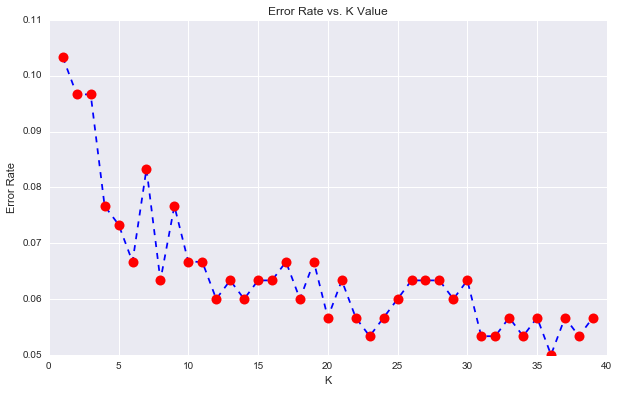

In [ ]:
# Here we can see that that after arouns K>23 the error rate just tends to hover around 0.06-0.05 
# Let's retrain the model with that and check the classification report
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))



# NOW WITH K=23
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

## Decision Trees and Random Forests in Python

In [ ]:
# Train Test Split
from sklearn.model_selection import train_test_split
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

# Prediction and Evaluation 
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

# Tree Visualization
# Scikit learn actually has some built-in visualization capabilities for decision trees, 
# you won't use this often and it requires you to install the pydot library, 
# but here is an example of what it looks like and the code to execute this
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  



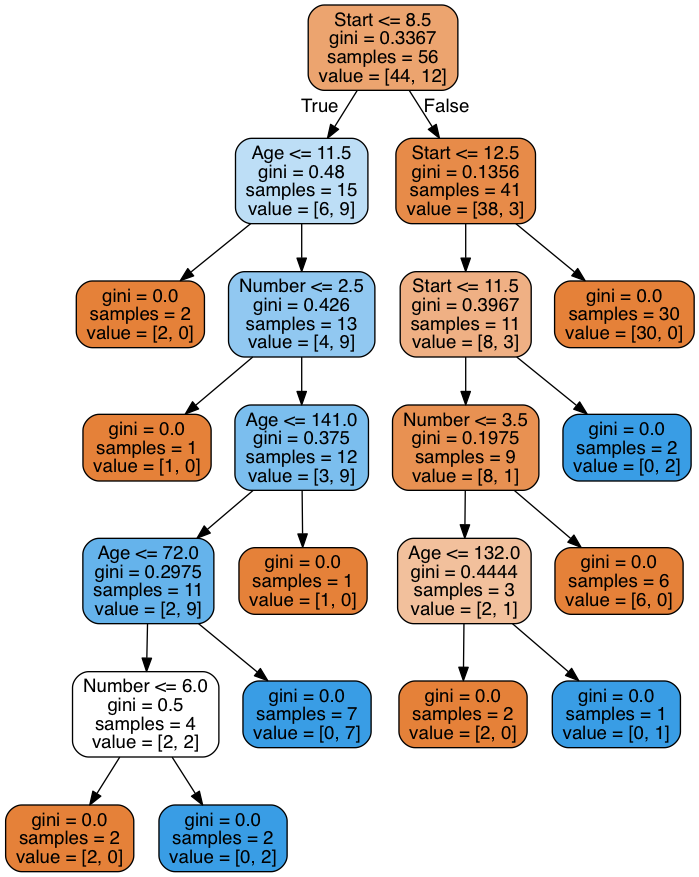

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

## Support Vector Machines

In [ ]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_feat, np.ravel(df_target), test_size=0.30, random_state=101)

# Train the Support Vector Classifier
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)

# Predictions and Evaluations
predictions = model.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

# Gridsearch
# trying out all the possible combinations is called a Gridsearch, this method is common enough that Scikit-learn has this 
# functionality built in with GridSearchCV
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
# What fit does is a bit more involved then usual. First, it runs the same loop with cross-validation, 
# to find the best parameter combination. Once it has the best combination, 
# it runs fit again on all data passed to fit (without cross-validation), to built a single new model using the best parameter setting.
# May take awhile!
grid.fit(X_train,y_train)
# inspect the best parameters
grid.best_params_
grid.best_estimator_
# re-run predictions on this grid object just like you would with a normal model
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

## K Means Clustering
K Means Clustering is an unsupervised learning algorithm that tries to cluster data based on their similarity. 

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(data[0])
kmeans.cluster_centers_
kmeans.labels_

# chart original vs k means
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(data[0][:,0],data[0][:,1],c=kmeans.labels_,cmap='rainbow')
ax2.set_title("Original")
ax2.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

## Principal Component Analysis
Since this isn't exactly a full machine learning algorithm, but instead an unsupervised learning algorithm
Remember that PCA is just a transformation of your data and attempts to find out what features explain the most variance in your data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)

# Now we can transform this data to its first 2 principal components.
x_pca = pca.transform(scaled_data)
scaled_data.shape
x_pca.shape

# We've reduced 30 dimensions to just 2! Let's plot these two dimensions out!
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

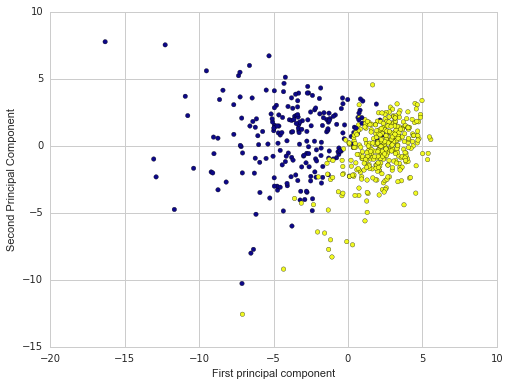

In [ ]:
# Unfortunately, with this great power of dimensionality reduction, 
# comes the cost of being able to easily understand what these components represent.

# In this numpy matrix array, each row represents a principal component, and each column relates back to the original features. 
# we can visualize this relationship with a heatmap:
df_comp = pd.DataFrame(pca.components_,columns=cancer['feature_names'])
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

# This heatmap and the color bar basically represent the correlation between the various feature 
# and the principal component itself.

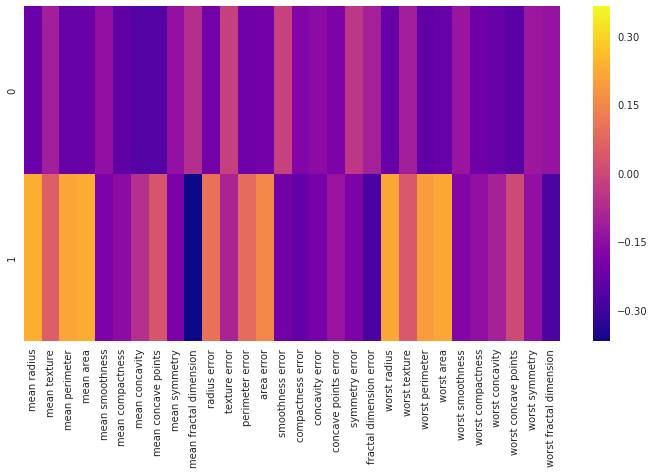

## Segmented Regression
- also known as piecewise regression or broken-stick regression 
- the independent variable is partitioned into intervals and a separate line segment is fit to each interval
- Segmented regression is useful when the independent variables, clustered into different groups, exhibit different relationships between the variables in these regions.
- the relations in the intervals are obtained by linear regression
- my comments: instead of one straight line, there are two or more straight lines the have different slopes & intercepts

##### NLP (Natural Language Processing)

In [1]:
import nltk # Imports the library

## Determine Variables To Keep
- if use cross validation, must use it to narrow down the variables; NOT just randomly pick
- 5 methods of building models: all-in, backward elimination, forward selection, bidirectional elimination, score comparison
- All-in use when know they are the true predictors OR you have to use all OR preparing for backward elimination
- Backward elimination. 1. select significance level to stay in the model (eg 5%); 2. fit model with all predictors; 3. Remove the predictor with highest variable IF it is above the significance level; 4. Fit the model without this variable; 5. Repeat until predictor with highest p value is below significance.
- Forward selection. 1. select significance level for model; 2. fit all simple regression models and choose model with lowest p value; 3. Keep this variable and fit all possible models with one extra predictor added to the one(s) you already have; 4. Consider the predictor with the lowest p-value. If above significance, redo step 3; 5. stop when highest predictor is below significance level
- Bidirectional elimination. 1. select significance level to stay in model; 2. perform forward selection (new variable must have p<significance to enter); 3. perform all step of backward elimination (old variable must have p<significance to stay); 4. stop when no new variable to enter or add
- All possible models/ score comparision. 1. select a criterion of goodness of fit (eg. Akakie criterion); 2. construct all possible regression models; 3. select one with best criterion; 4. model is done
- Exceptions: Even though the p-value may be above the signifance level, if it is only marginally above, then look at adjusted R squared of the entire model to see if should keep the variable. If R squared goes up, model is a better fit so keep the variable that is slightly above the significance level.
- When referring to the coefficients, ensure referring to units properly (whether dollars, km, etc.). Can compare if on same scale.
- Coefficients for each variable change as change the variables in the model.

- Best to understand the variables because if just put all the variables in, there is a chance that it may show significance in formula.
- for example, things that are not significant may be row number, surname (but may be indicator of something else)

TRANSFORM VARIABLES
- Depending on the choice of model algorithm one may require all features to be converted to numerical equivalent values. So for instance converting text categorical values to numeric values.
- change transform by scale, square root of variable, apply power to variable, log of variable like 10 (when greater than zero)
- can add 1 to variable or split variable into 2
- try it out and see if improves model
- want to remove the tranformed variable from the model to avoid correleated varaibles
- divide one variable by another OR multiply one variable by another eg wealth = balance/age
- if create a new variable, remove correlated variables
- determine in multicolinearity (which don't want), gretl does automatically, unsure how otherwise. Take suspected colinearity out of the model and the variable becomes significant then likely was colinearity.
- can transform the new variables as well
- create a correlation matrix to determine correlations of variables where 1 is perfectly correlated and want to avoid this. Avoid over 0.7, correct. 0.5 to 0.3, look into it. Below 0.3 is low correlation. Correlation is bad because it can't find the correct correlation for the variables.
- should not just base on accuracy rate since can be accuracy paradox where abandonment of one model increases accuracy rate
- cumulative accuracy profile can plot models against each other so can see how much gain get from one over the other. Diagonal line at 45 degrees is the random model. If model is under the curve, very bad model.
- to get accuracy ratio, look at % on y axis when take 50% on x axis. If value on y less than 60% than bad. If y value between 60% & 70% then poor. If y value between 70% & 80% then good. If above then very good. If between 90% & 100% then may be too good.



HOW DO I DETERMINE SIGNIFICANCE LEVEL
explain dummy variables to replace a variable (use one less when fitting the model)
good way to understand is visualize

Earthquake competition (given 16 earthquakes as train and small segments as test):

winner: the signal had a certain time-trend that caused some issues specifically on mean and quantile based features. To partly overcome this, we added a constant noise to each 150k segment (both in train and test) by calculating np.random.normal(0, 0.5, 150_000). Additionally, after noise addition, we subtracted the median of the segment.
i did a bar chart of the most common values. The values were all very small. So i subtracted out a range of the small values.
One of our best final LGB model only used four features: (i) number of peaks of at least support 2 on the denoised signal, (ii) 20% percentile on std of rolling window of size 50, (iii) 4th and (iv) 18th Mel-frequency cepstral coefficients mean. We sometimes used a few more features (like for the NN, see below) but they are usually very similar. Those 4 are decently uncorrelated between themselves, and add good diversity. For each feature we always only considered it if it has a p-value >0.05 on a KS statistic of train vs test.

## Evaluate Model
- R2 - range from 0 to 1; 1 means all movements of one variable explains other variable, goodness of fit
- TSS/ SST  - total sum of squares (SSR + SSE)
- SSR - explained deviation from mean
- SSE - sum squares error (unexplained deviation from mean)
- F-test
- RMSE
- always measure against mean since want to do better than the mean
- when variables are widely spread then low r squared and high SSE
- not widely spread = high R squared and low SSE
